In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic', size=10)
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(4.5, 3))

In [77]:
df = pd.read_csv('movies.csv')
df.head()

,연도,순위,제목,개봉일,관객수,관람등급,줄거리,링크
0,2012,1,도둑들,12.07.25,"12,984,701",15세이상관람가,"10인의 도둑, 1개의 다이아몬드그들이 움직이기 시작했다!한 팀으로 활동 중인 한국...",https://movie.daum.net/moviedb/main?movieId=63478
1,2012,2,"광해, 왕이 된 남자",12.09.13,"12,324,062",15세이상관람가,역사에 기록되지 않은 또 한 명의 광해 왕위를 둘러싼 권력 다툼과 당쟁으로 혼란이 ...,https://movie.daum.net/moviedb/main?movieId=63847
2,2012,3,어벤져스,12.04.26,"7,087,971",12세이상관람가,ASSEMBLE! 최강의 슈퍼히어로들이 모였다!지구의 운명을 건 거대한 전쟁이 시작...,https://movie.daum.net/moviedb/main?movieId=54081
3,2012,4,늑대소년,12.10.31,"6,655,501",15세이상관람가,"체온 46도, 혈액형 판독불가…세상에 없어야 할 위험한 존재 늑대소년, 운명적 사랑...",https://movie.daum.net/moviedb/main?movieId=67118
4,2012,5,다크 나이트 라이즈,12.07.19,"6,428,574",15세이상관람가,"`배트맨` vs `베인`, 운명을 건 최후의 전투다크 나이트 신화의 전설이 끝난다“...",https://movie.daum.net/moviedb/main?movieId=57958


In [78]:
df.loc[:, '관객수'] = df.loc[:, '관객수'].str.replace(',', '').astype(int)
df.head()

,연도,순위,제목,개봉일,관객수,관람등급,줄거리,링크
0,2012,1,도둑들,12.07.25,12984701,15세이상관람가,"10인의 도둑, 1개의 다이아몬드그들이 움직이기 시작했다!한 팀으로 활동 중인 한국...",https://movie.daum.net/moviedb/main?movieId=63478
1,2012,2,"광해, 왕이 된 남자",12.09.13,12324062,15세이상관람가,역사에 기록되지 않은 또 한 명의 광해 왕위를 둘러싼 권력 다툼과 당쟁으로 혼란이 ...,https://movie.daum.net/moviedb/main?movieId=63847
2,2012,3,어벤져스,12.04.26,7087971,12세이상관람가,ASSEMBLE! 최강의 슈퍼히어로들이 모였다!지구의 운명을 건 거대한 전쟁이 시작...,https://movie.daum.net/moviedb/main?movieId=54081
3,2012,4,늑대소년,12.10.31,6655501,15세이상관람가,"체온 46도, 혈액형 판독불가…세상에 없어야 할 위험한 존재 늑대소년, 운명적 사랑...",https://movie.daum.net/moviedb/main?movieId=67118
4,2012,5,다크 나이트 라이즈,12.07.19,6428574,15세이상관람가,"`배트맨` vs `베인`, 운명을 건 최후의 전투다크 나이트 신화의 전설이 끝난다“...",https://movie.daum.net/moviedb/main?movieId=57958


In [79]:
df2 = df.groupby('연도')['관객수'].sum()
df2

연도
2012    160695608
2013    182865178
2014    191915773
2015    188648684
2016    176400192
2017    184416671
2018    187392030
2019    195051797
2020     98389735
2021     54317981
2022    112776662
Name: 관객수, dtype: int32

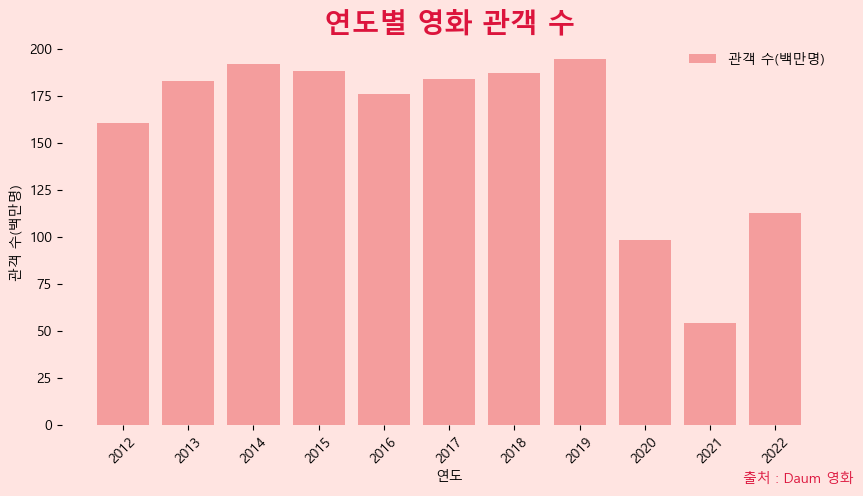

In [80]:
plt.figure(figsize=(10, 5), facecolor='mistyrose')
plt.title('연도별 영화 관객 수', fontsize=20, color='crimson', fontweight='bold')

plt.bar(df2.index, df2.values / 1000000, color='lightcoral', label='관객 수(백만명)', alpha=0.7)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('mistyrose')

plt.xlabel('연도')
plt.xticks(df2.index, rotation=45)
plt.ylabel('관객 수(백만명)')

plt.legend(facecolor='mistyrose', edgecolor='mistyrose')
plt.annotate('출처 : Daum 영화', xy=(0.95, -0.15), xycoords='axes fraction', ha='center', fontsize=10, color='crimson')
plt.savefig('2012~2022 연도별 영화 관객 수.png', dpi=100)
plt.show()

In [81]:
df3 = df.groupby('관람등급')['관객수'].sum()
df3

관람등급
12세이상관람가    703460120
15세이상관람가    748712955
전체관람가       164913226
청소년관람불가     115784010
Name: 관객수, dtype: int32

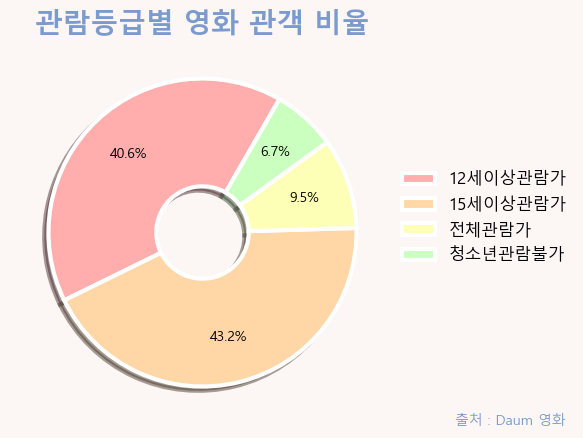

In [82]:
plt.figure(figsize=(10, 5), facecolor='#fcf6f5')
plt.title('관람등급별 영화 관객 비율', fontsize=20, color='#7b9acd', fontweight='bold')

colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf']
wedgeprops = {'width' : 0.7, 'edgecolor' : 'w', 'linewidth' : 3}

plt.pie(df3.values, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops, startangle=60, pctdistance=0.7, shadow=True)

plt.legend(df3.index, loc=(1, 0.4), fontsize=12, facecolor='#fcf6f5', edgecolor='#fcf6f5')
plt.annotate('출처 : Daum 영화', xy=(1.3, 0), xycoords='axes fraction', ha='center', fontsize=10, color='#7b9acd')
plt.savefig('관람등급별 영화 관객 비율.png', dpi=100)
plt.show()

In [83]:
df4 = df[df['관객수'] >= 10000000].groupby('연도')['제목'].count()
df4

연도
2012    2
2013    2
2014    5
2015    4
2016    1
2017    2
2018    3
2019    5
2020    3
2022    2
Name: 제목, dtype: int64

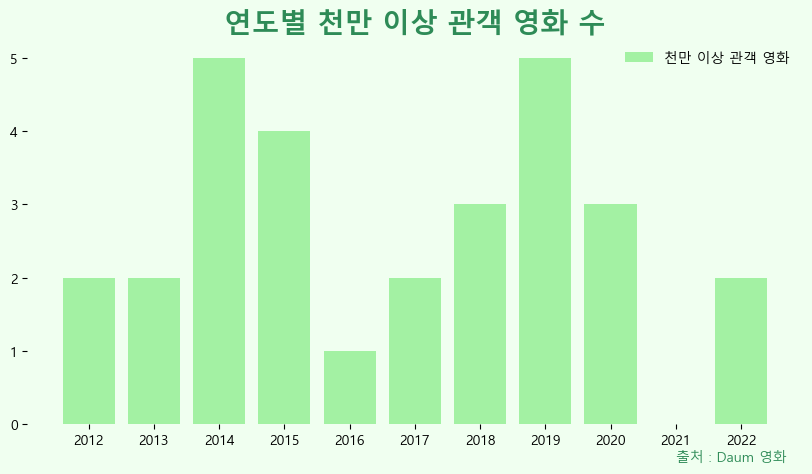

In [84]:
plt.figure(figsize=(10, 5), facecolor='honeydew')
plt.title('연도별 천만 이상 관객 영화 수', fontsize=20, color='seagreen', fontweight='bold')

plt.bar(df4.index, df4.values, color='lightgreen', alpha=0.8)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('honeydew')

plt.xticks(range(2012, 2023))

plt.legend(['천만 이상 관객 영화'], facecolor='honeydew', edgecolor='honeydew')
plt.annotate('출처 : Daum 영화', xy=(2012, 0), xytext=(2021, -0.5), fontsize=10, color='seagreen')
plt.savefig('2012~2022 연도별 천만 이상 관객 영화 수.png', dpi=100)
plt.show()

In [85]:
df5 = df.iloc[:, :5]
df5

,연도,순위,제목,개봉일,관객수
0,2012,1,도둑들,12.07.25,12984701
1,2012,2,"광해, 왕이 된 남자",12.09.13,12324062
2,2012,3,어벤져스,12.04.26,7087971
3,2012,4,늑대소년,12.10.31,6655501
4,2012,5,다크 나이트 라이즈,12.07.19,6428574
...,...,...,...,...,...
541,2022,46,놉,22.08.17,415969
542,2022,47,리멤버,22.10.26,412836
543,2022,48,킹스맨: 퍼스트 에이전트,21.12.22,1029365
544,2022,49,배드 가이즈,22.05.04,400329


In [86]:
df5.loc[:, '개봉일'] = df5.loc[:, '개봉일'].str[3:5].astype(int)
df5

,연도,순위,제목,개봉일,관객수
0,2012,1,도둑들,7,12984701
1,2012,2,"광해, 왕이 된 남자",9,12324062
2,2012,3,어벤져스,4,7087971
3,2012,4,늑대소년,10,6655501
4,2012,5,다크 나이트 라이즈,7,6428574
...,...,...,...,...,...
541,2022,46,놉,8,415969
542,2022,47,리멤버,10,412836
543,2022,48,킹스맨: 퍼스트 에이전트,12,1029365
544,2022,49,배드 가이즈,5,400329


In [87]:
df5.rename(columns={'개봉일' : '개봉월'}, inplace=True)
df5

,연도,순위,제목,개봉월,관객수
0,2012,1,도둑들,7,12984701
1,2012,2,"광해, 왕이 된 남자",9,12324062
2,2012,3,어벤져스,4,7087971
3,2012,4,늑대소년,10,6655501
4,2012,5,다크 나이트 라이즈,7,6428574
...,...,...,...,...,...
541,2022,46,놉,8,415969
542,2022,47,리멤버,10,412836
543,2022,48,킹스맨: 퍼스트 에이전트,12,1029365
544,2022,49,배드 가이즈,5,400329


In [88]:
df5 = df5.groupby(['연도', '개봉월'])['관객수'].mean()
df5

연도    개봉월
2012  1      2.687128e+06
      2      2.686318e+06
      3      2.757555e+06
      4      2.980588e+06
      5      2.472858e+06
                 ...     
2022  8      2.202004e+06
      9      2.070128e+06
      10     6.434823e+05
      11     1.417482e+06
      12     5.615102e+06
Name: 관객수, Length: 130, dtype: float64

In [89]:
df5 = df5.unstack().fillna(df5.unstack().mean())
df5

개봉월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2012,2.687128e+06,2.686318e+06,2.757555e+06,2.980588e+06,2.472858e+06,3.041582e+06,6.394362e+06,2.144919e+06,4.955406e+06,2.923586e+06,2.357349e+06,4.294528e+06
2013,6.380950e+06,3.063884e+06,1.812570e+06,3.421116e+06,1.734828e+06,3.896604e+06,3.315216e+06,4.400347e+06,4.945404e+06,2.405130e+06,2.093157e+06,4.888482e+06
2014,5.655493e+06,1.559917e+06,2.301160e+06,2.962454e+06,2.650944e+06,5.001024e+06,5.717627e+06,3.923816e+06,2.606821e+06,1.630393e+06,4.421179e+06,6.114797e+06
2015,1.825093e+06,3.365320e+06,2.345351e+06,4.098540e+06,2.385600e+06,4.042514e+06,5.934219e+06,5.487047e+06,3.615374e+06,2.163860e+06,4.779217e+06,5.039555e+06
2016,1.934912e+06,4.500513e+06,2.256913e+06,4.940636e+06,3.749922e+06,1.747259e+06,4.830732e+06,3.234742e+06,3.553472e+06,6.211450e+06,2.935139e+06,4.419419e+06
2017,4.811418e+06,2.204286e+06,2.988717e+06,2.219107e+06,2.287022e+06,2.887909e+06,4.997251e+06,4.640423e+06,3.629343e+06,5.196082e+06,2.013612e+06,8.312649e+06
2018,2.737099e+06,2.416291e+06,2.212219e+06,4.604311e+06,4.424462e+06,3.334738e+06,5.022108e+06,4.641013e+06,3.165451e+06,4.903962e+06,2.587683e+06,4.352610e+06
2019,4.357533e+06,2.012579e+06,3.555675e+06,7.587675e+06,5.916928e+06,1.834137e+06,4.983995e+06,2.873732e+06,2.281505e+06,2.825706e+06,6.130002e+06,3.808339e+06
2020,1.512394e+06,8.803977e+05,2.143415e+06,3.395390e+06,7.776167e+06,7.868680e+05,1.928820e+06,2.532126e+06,5.605550e+05,9.878005e+05,3.249234e+06,2.237127e+06


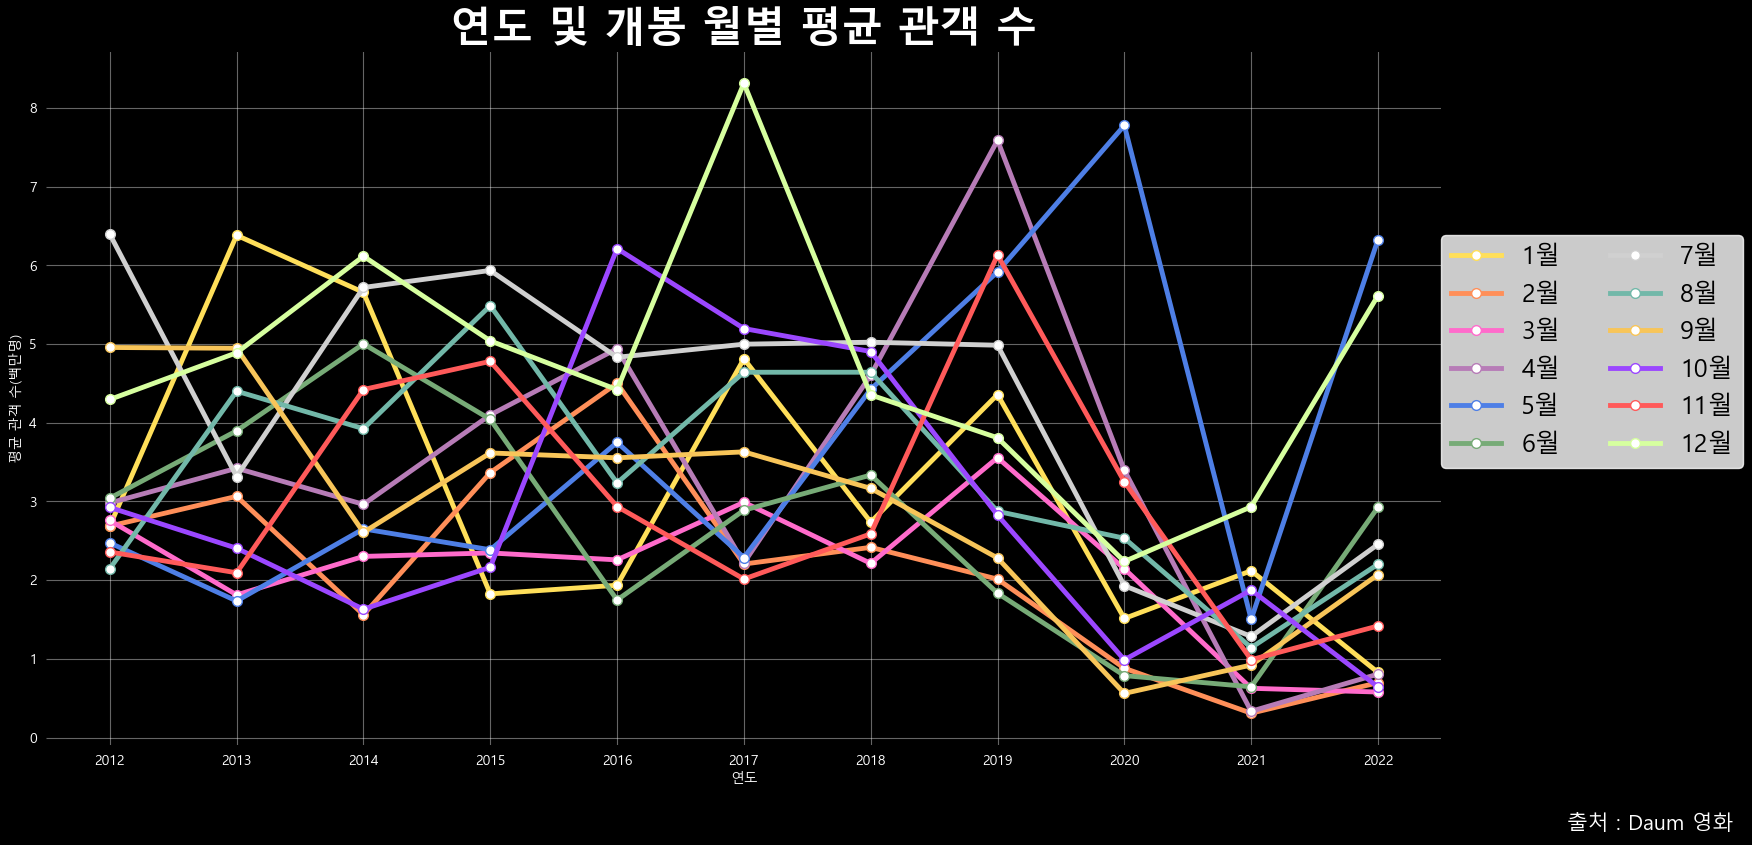

In [96]:
plt.figure(figsize=(18, 9), facecolor='black')
plt.title('연도 및 개봉 월별 평균 관객 수', fontsize=30, color='white', fontweight='bold')

colors = ['#FFDF5A', '#FF8F59', '#FF6BCB', '#B77CB7', '#4E7FE6', '#77AB77', '#D0D0D0', '#72B8A9', '#F8C559', '#9B47FF', '#FF5A5A', '#D6FF9F']

for i in range(1, 13):
    plt.plot(df5.index, df5[i] / 1000000, label=f'{i}월', color=colors[i - 1], marker='o', lw=3.5, mfc='white', ms=7)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('black')

plt.xlabel('연도', color='white')
plt.xticks(range(2012, 2023), color='white')
plt.ylabel('평균 관객 수(백만명)', color='white')
plt.yticks(color='white')
plt.grid(color='white', alpha=0.4)

plt.legend(loc=(1, 0.4), fontsize=18, facecolor='white', edgecolor='white', ncol=2)
plt.annotate('출처 : Daum 영화', xy=(0.5, 0), xytext=(1.15, -0.1), xycoords='axes fraction', textcoords='axes fraction', ha='center', va='top', fontsize=15, color='white')
plt.savefig('2012~2022 연도 및 개봉 월별 평균 관객 수.png', dpi=100)
plt.show()